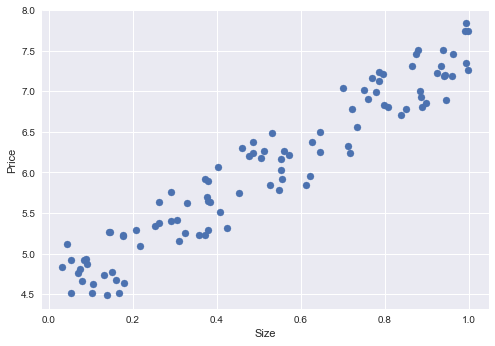

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# creating random data
sizes = np.random.rand(100, 1)
prices = 4 + 3 * sizes + np.random.rand(100, 1)

# visualizing random data
plt.style.use('seaborn')
plt.scatter(sizes, prices)
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


In [14]:
# defining hypothesis function
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

# defining cost function
def cost_function(y_pred, y_true):
    return (1 / (2 * len(y_true))) * np.sum((y_pred - y_true) ** 2)

# defining gradient descent algorithm
def gradient_descent(x, y_true, theta0, theta1, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    theta0_history = np.zeros(iterations)
    theta1_history = np.zeros(iterations)
    for i in range(iterations):
        y_pred = hypothesis(theta0, theta1, x)
        theta0 = theta0 - learning_rate * (1 / len(x)) * np.sum(y_pred - y_true)
        theta1 = theta1 - learning_rate * (1 / len(x)) * np.sum((y_pred - y_true) * x)
        theta0_history[i] = theta0
        theta1_history[i] = theta1
        cost_history[i] = cost_function(y_pred, y_true)
    return theta0, theta1, cost_history, theta0_history, theta1_history

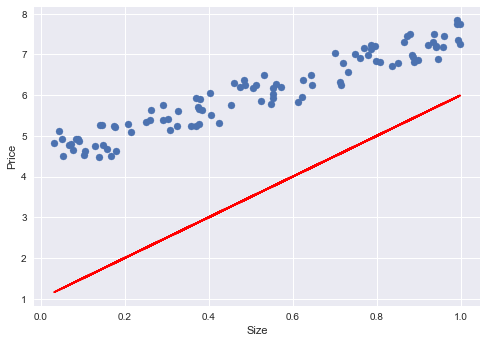

In [15]:
# supposing theta0 = 1 and theta1 = 5
theta0 = 1
theta1 = 5

# visualizing hypothesis function
plt.scatter(sizes, prices)
plt.plot(sizes, hypothesis(theta0, theta1, sizes), color='r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

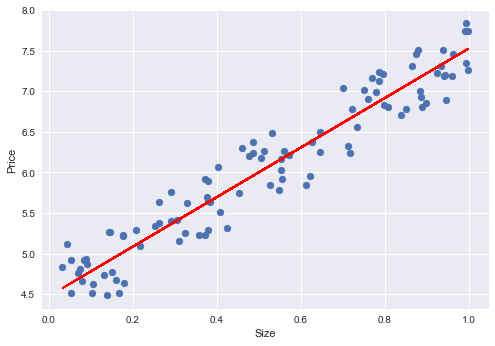

In [16]:
# choosing learning rate and iterations
learning_rate = 0.05
iterations = 1000

# running gradient descent algorithm
theta0, theta1, cost_history, theta0_history, theta1_history = gradient_descent(sizes, prices, theta0, theta1, learning_rate, iterations)

# visualizing the new hypothesis function
plt.scatter(sizes, prices)
plt.plot(sizes, hypothesis(theta0, theta1, sizes), color='r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

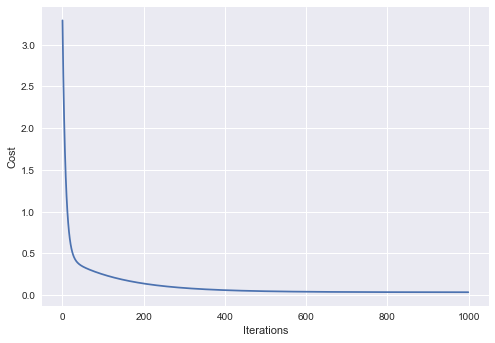

In [17]:
# visualizing cost function
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

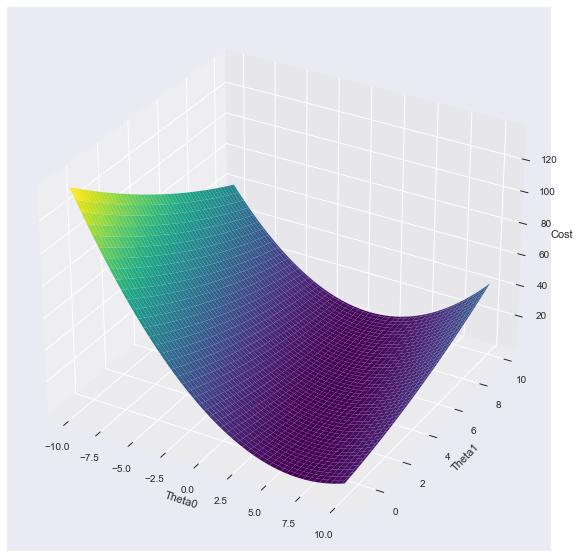

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# visualizing theta0 and theta1 and their influence on cost function
theta0s = np.linspace(-10, 10, 100)
theta1s = np.linspace(-1, 10, 100)

theta0s, theta1s = np.meshgrid(theta0s, theta1s)

costs = np.zeros((theta0s.shape[0], theta0s.shape[1]))

for i in range(theta0s.shape[0]):
    for j in range(theta0s.shape[1]):
        costs[i, j] = cost_function(hypothesis(theta0s[i, j], theta1s[i, j], sizes), prices)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0s, theta1s, costs, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
plt.show()